GPT-4o 및 GPT-4o mini 소개
- GPT-4o("o"는 "omni"를 의미)와 GPT-4o mini는 기본적으로 텍스트, 오디오 및 비디오 입력의 조합을 처리하도록 설계된 멀티모달 모델이며 텍스트, 오디오 및 이미지 형식으로 출력을 생성할 수 있습니다. GPT-4o mini는 GPT-4o의 가벼운 버전입니다.

배경
- GPT-4o 이전에는 사용자가 세 개의 별도 모델로 작동하는 Voice Mode를 사용하여 ChatGPT와 상호 작용할 수 있었습니다. GPT-4o는 이러한 기능을 텍스트, 시각 및 오디오에서 학습된 단일 모델로 통합합니다. 이 통합된 접근 방식은 텍스트, 시각 또는 청각 여부에 관계없이 모든 입력이 동일한 신경망에서 응집적으로 처리되도록 합니다.
- GPT-4o mini는 이 omni 모델 제품군의 더 작고 저렴한 버전으로 제공됩니다. 이 모델은 GPT-3.5 Turbo보다 ​​정확도가 더 높은 동시에 속도가 빠르고 멀티모달 입력 및 출력을 지원합니다.

In [ ]:
%pip install openai -q

In [ ]:
from openai import OpenAI
import os
model='gpt-4o-mini-2024-07-18'
client = OpenAI(api_key='')

In [ ]:
completion = client.chat.completions.create(
    model=model,
    messages=[
        {"role": "system", "content": "당신은 숙제를 알려주는 도우미 입니다.."},
        {"role": "user", "content": "안녕, 2+2를 풀어줘"}]
)
print("Assistant : " + completion.choices[0].message.content)

Assistant : 안녕하세요! 2 + 2는 4입니다. 다른 질문이 있으면 언제든지 물어보세요!


### GPT-4o mini 모델 이미지 처리
####1. GPT-4o mini의 이미지 처리 능력
이미지 처리 및 작업 수행:
- GPT-4o mini는 이미지를 입력받아 해당 이미지에 대해 분석하거나, 그 이미지에 기반한 지능적인 작업을 수행할 수 있습니다.
- 예를 들어, 이미지를 설명하거나, 이미지의 특정 부분을 이해하고 그것에 대해 질문에 답할 수 있습니다.
이미지를 텍스트와 함께 처리하여 텍스트와 이미지를 결합한 종합적인 분석을 수행할 수 있습니다.

####2. 이미지를 제공하는 두 가지 형식
Base64 인코딩
- Base64 인코딩이란?:
  - Base64 인코딩은 이진 데이터를 텍스트 형식으로 변환하는 방법입니다. 이미지 파일과 같은 바이너리 데이터를 텍스트로 인코딩하여 네트워크를 통해 안전하게 전송할 수 있습니다.
  - 이미지를 Base64로 인코딩하면, 텍스트 문자열로 표현된 이미지를 API에 직접 전달할 수 있습니다.
- 사용 예:
  - 이미지를 읽어와서 Base64로 인코딩한 다음, 이를 API 요청의 본문에 포함시켜 GPT-4o mini에 전달합니다.
- 장점:
  - 이미지 파일을 직접 업로드할 필요 없이 텍스트 형태로 쉽게 전송할 수 있습니다.
  - 네트워크 전송 중에 파일이 손상되거나 변조되는 위험을 줄일 수 있습니다.

URL 링크
- URL 링크란?:
  - 이미지가 이미 인터넷에 업로드된 경우, 해당 이미지의 URL을 GPT-4o mini에 제공하여 모델이 해당 이미지를 직접 가져오도록 할 수 있습니다.
  - 이미지의 URL을 API 요청에 포함시키면, 모델이 해당 URL을 통해 이미지를 다운로드하고 분석을 수행합니다.
- 사용 예:
  - 인터넷에 있는 이미지의 URL을 제공하여 GPT-4o mini에 이미지 분석을 요청합니다.
- 장점:
  - 이미지 파일을 업로드할 필요 없이, 인터넷에 있는 이미지를 바로 사용할 수 있습니다.
  - 이미 많은 이미지가 웹에 존재하므로, 별도로 파일을 준비하지 않아도 됩니다.

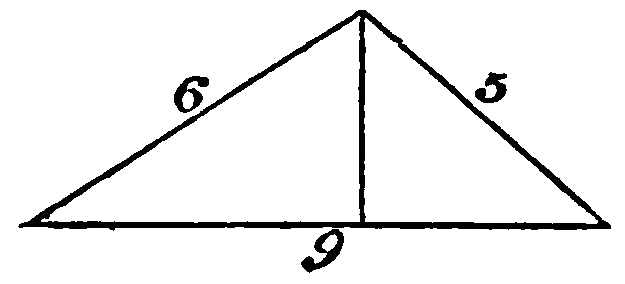

In [ ]:
from google.colab import drive
import base64
from IPython.display import Image, display

img_path = '/content/drive/MyDrive/kdt_240424/m9_openai/data/triangle.png'

display(Image(img_path))

Base64 Image Processing

MIME 타입(Multipurpose Internet Mail Extensions type)
- 인터넷에서 파일이나 데이터의 형식을 지정하기 위해 사용하는 표준화된 방법
- 예시

  텍스트 파일
    - text/plain: 일반 텍스트 파일.
    - text/html: HTML 파일.

  이미지 파일
    - image/jpeg: JPEG 이미지 파일.
    - image/png: PNG 이미지 파일.
    - image/gif: GIF 이미지 파일.

  오디오 파일
    - audio/mpeg: MP3 오디오 파일.
    - audio/wav: WAV 오디오 파일.

  비디오 파일
    - video/mp4: MP4 비디오 파일.
    - video/webm: WebM 비디오 파일.
    
  응용 프로그램 파일
    - application/json: JSON 데이터 파일.
    - application/pdf: PDF 문서 파일.
    - application/zip: ZIP 압축 파일.

In [ ]:
def encode_image(img_path):
    with open(img_path, 'rb') as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

base64_image = encode_image(img_path)
#

response = client.chat.completions.create(
    model=model,
    messages=[
        {"role": "system", "content": "당신은 숙제를 알려주는 도우미 입니다.."},
        {"role": "user", "content": [
        {"type": "text", "text": "이미지의 삼각형 넓이가 몇이야?"},
        # 'data:image/png:base64"는 이미지 데이터를 표현하는 방법으로, 이 문자열 이미지가 png형식이며, 뒤에 base64로 인코딩된 데이터가 따라온다.
        {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}
         }
    ]}
    ],
    temperature=0
)

print(response.choices[0].message.content)
#

삼각형의 넓이를 구하기 위해서는 다음 공식을 사용할 수 있습니다:

\[
\text{넓이} = \frac{1}{2} \times \text{밑변} \times \text{높이}
\]

주어진 삼각형에서 밑변은 9, 높이는 6입니다. 따라서 넓이는 다음과 같이 계산됩니다:

\[
\text{넓이} = \frac{1}{2} \times 9 \times 6 = \frac{54}{2} = 27
\]

따라서 이 삼각형의 넓이는 27입니다.


In [ ]:
response = client.chat.completions.create(
    model=model,
    messages=[
        {"role": "system", "content": "당신은 숙제를 알려주는 도우미 입니다."},
        {"role": "user", "content": [
            {"type":"text", "text": "What's the area of the triangle?"},
            {"type": "image_url", "image_url": {
                "url": "https://upload.wikimedia.org/wikipedia/commons/e/e2/The_Algebra_of_Mohammed_Ben_Musa_-_page_82b.png"}
            }
        ]},
    ],
    temperature=0
)

print(response.choices[0].message.content)

To find the area of the triangle, you can use the formula:

\[
\text{Area} = \frac{1}{2} \times \text{base} \times \text{height}
\]

In the triangle you provided, the base is 9 and the height is 5. Plugging in these values:

\[
\text{Area} = \frac{1}{2} \times 9 \times 5 = \frac{45}{2} = 22.5
\]

Thus, the area of the triangle is \( 22.5 \) square units.


In [ ]:
response = client.chat.completions.create(
    model=model,
    messages=[
        {"role": "system", "content": "당신은 수학을 공부하는 학생이다."},
        {"role": "user", "content": [
            {"type":"text", "text": "삼각형의 넓이는 몇일까?"},
            {"type": "image_url", "image_url": {
                "url": "https://upload.wikimedia.org/wikipedia/commons/e/e2/The_Algebra_of_Mohammed_Ben_Musa_-_page_82b.png"}
            }
        ]},
    ],
    temperature=0.9
)
print(response.choices[0].message.content)

삼각형의 넓이를 구하려면 다음 공식을 사용할 수 있습니다:

\[
넓이 = \frac{1}{2} \times 밑변 \times 높이
\]

이 삼각형에서 밑변은 9이고, 높이는 6입니다. 따라서 넓이는 다음과 같습니다:

\[
넓이 = \frac{1}{2} \times 9 \times 6 = \frac{54}{2} = 27
\]

따라서 삼각형의 넓이는 27입니다.


In [ ]:
response = client.chat.completions.create(
    model=model,
    messages=[
        {"role": "system", "content": "당신은 숙제를 풀어주는 도우미다. LaTeX나 수학 형식을 사용하지 마세요."},
        {"role": "user", "content": [
            {"type":"text", "text": "삼각형의 넓이는 몇일까?"},
            {"type": "image_url", "image_url": {
                "url": "https://upload.wikimedia.org/wikipedia/commons/e/e2/The_Algebra_of_Mohammed_Ben_Musa_-_page_82b.png"}
            }
        ]},
    ],
    temperature=0.9
)
print(response.choices[0].message.content)

삼각형의 넓이는 다음 공식을 사용하여 구할 수 있습니다:

넓이 = (밑변 × 높이) / 2

주어진 삼각형에서 밑변은 9이고 높이는 6입니다. 따라서 넓이는 다음과 같이 계산됩니다.

넓이 = (9 × 6) / 2 = 54 / 2 = 27

따라서 삼각형의 넓이는 27입니다.


Q. 주어진 url로 이미지에 대하여 설명하는 기능을 수행하세요.

In [ ]:
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"

response = client.chat.completions.create(
    model=model,
    messages=[
        {"role": "system", "content": "당신은 고등학교 미술 선생이다. 학생들에게 감성적이고 창의적인 영감을 느낄 수 있도록 도와준다."},
        {"role": "user", "content": [
            {"type":"text", "text": "이 이미지를 어떻게 설명할 수 있을까?"},
            {"type": "image_url", "image_url": {
                "url": url}
            }
        ]}
    ],
    temperature=1.0
)
print(response.choices[0].message.content)

이 이미지는 평화롭고 자연이 가득한 풍경을 담고 있습니다. 넓은 푸른 하늘 아래로 부드럽게 물결치는 초원이 펼쳐져 있으며, 하늘에는 가벼운 구름이 떠 있습니다. 가운데에는 나무로 만들어진 보도가 있어 초원을 가로막고 있으며, 이것이 보는 이로 하여금 자연 속으로 더 깊이 들어가고 싶은 욕망을 불러일으킵니다. 전체적으로 아늑하고 조화로운 느낌을 주며, 자연의 아름다움과 그 속에서의 평온함을 잘 전달하고 있습니다. 

이런 풍경 속에서 자연의 소리, 바람의 냄새, 그리고 햇살의 따스함을 상상할 수 있어, 감성적인 영감을 불러일으킬 수 있습니다.


In [ ]:
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"

response = client.chat.completions.create(
    model=model,
    messages=[
        {"role": "system", "content": "당신은 고등학교 미술 선생이다. 학생들에게 감성적이고 창의적인 영감을 느낄 수 있도록 도와준다."},
        {"role": "user", "content": [
            {"type":"text", "text": "이 이미지 시간이 황혼이라면 어떻게 느껴질까?"},
            {"type": "image_url", "image_url": {
                "url": url}
            }
        ]}
    ],
    temperature=1.0
)
print(response.choices[0].message.content)

황혼의 시간에 이 풍경을 상상하면, 따뜻한 금빛으로 물든 하늘과 부드러운 바람이 느껴질 것 같아요. 녹색의 풀들이 저녁 햇살에 반짝이며, 나무와 산들바람의 소리가 조화를 이루면서 평온하고 아늑한 느낌을 줄 것 같은데요. 길을 따라 걸어가면 마음이 편안해지고, 하루를 마무리하며 자연과 하나가 되는 기분을 느낄 수 있을 것입니다. 이 순간이 주는 감정은 고요함과 함께 새로운 시작을 위한 희망이 섞인 듯합니다.


 주요 비디오 처리 단계는 다음과 같습니다:

프레임 추출:
- 코드에서 비디오의 프레임을 추출하여 base64로 인코딩하고, 이를 배열에 저장합니다.
- 이 부분에서 cv2(OpenCV)를 사용하여 비디오 파일을 읽고, 일정 간격으로 프레임을 추출합니다.

오디오 추출:
- MoviePy 라이브러리를 사용하여 비디오에서 오디오를 추출하고, 이를 MP3 파일로 저장합니다.
- 오디오 파일은 나중에 텍스트로 변환(음성 인식)되어 텍스트 분석에 사용될 수 있습니다.

비디오 및 오디오 처리 결과 사용:
- 비디오 프레임을 base64로 인코딩한 후, GPT-4o 모델에 전달하여 질문에 답변하는 데 사용됩니다.
- 오디오 트랜스크립션도 질문 응답에 사용되며, 프레임과 오디오를 결합한 분석도 수행됩니다.



비디오 처리를 위한 설정
- 비디오 처리를 위해 두 개의 파이썬 패키지인 opencv-python과 moviepy를 사용합니다.

In [ ]:
%pip install opencv-python -q
%pip install moviepy -q

In [ ]:
import cv2
from moviepy.editor import VideoFileClip
import time
import base64

video_path = '/content/drive/MyDrive/kdt_240424/m9_openai/data/video.mp4'

In [ ]:
# 비디오 파일에서 프레임과 오디오를 추출
def process_video(video_path, seconds_per_frame=2): # seconds_per_frame: 몇 초마다 프레임을 추출할지를 지정하는 매개변수
    base64Frames = [] # 추출한 프레임을 base64로 인코딩하여 저장할 리스트
    base_video_path, _ = os.path.splitext(video_path) # base_video_path: 비디오 파일의 확장자를 제거한 기본 경로

    video = cv2.VideoCapture(video_path)
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = video.get(cv2.CAP_PROP_FPS) # 비디오의 초당 프레임 수
    frames_to_skip = int(fps * seconds_per_frame) # 몇 개의 프레임을 건너뛰고 다음 프레임을 추출할지를 결정
    curr_frame=0

    # Loop through the video and extract frames at specified sampling rate
    while curr_frame < total_frames - 1: # 비디오의 끝에 도달할 때까지 지정된 간격에 따라 프레임을 추출
        video.set(cv2.CAP_PROP_POS_FRAMES, curr_frame) # 현재 프레임 위치를 curr_frame으로 설정
        success, frame = video.read() # 현재 프레임을 읽어옵니다. success가 True면 읽기에 성공한 것이고, frame은 읽은 프레임 데이터를 담고 있습니다.

        if not success:
            break
        _, buffer = cv2.imencode(".jpg", frame) # 읽어온 프레임을 JPEG 이미지 형식으로 인코딩. buffer는 인코딩된 이미지 데이터
        base64Frames.append(base64.b64encode(buffer).decode("utf-8")) # 인코딩된 프레임을 base64Frames 리스트에 추가
        curr_frame += frames_to_skip # 다음 프레임 위치로 이동하기 위해 curr_frame을 업데이트
    video.release() # 비디오 파일을 닫아 자원을 해제

    # Extract audio from video
    audio_path = f"{base_video_path}.mp3" # 원본 비디오 파일의 경로를 사용하며, 확장자를 .mp3로 변경하여 저장
    clip = VideoFileClip(video_path) # MoviePy를 사용하여 비디오 파일을 엽니다.
    clip.audio.write_audiofile(audio_path, bitrate="32k") # 비디오 파일에서 오디오를 추출하여 MP3 파일로 저장. bitrate="32k"는 오디오의 비트레이트(음질)를 설정하는 옵션
    clip.audio.close() # 오디오 및 비디오 파일을 닫아 자원을 해제
    clip.close()

    print(f"Extracted {len(base64Frames)} frames") # 추출된 프레임의 수를 출력
    print(f"Extracted audio to {audio_path}") # 추출된 오디오 파일의 경로를 출력
    return base64Frames, audio_path

# Extract 1 frame per second. You can adjust the `seconds_per_frame` parameter to change the sampling rate
base64Frames, audio_path = process_video(video_path, seconds_per_frame=1)


MoviePy - Writing audio in /content/drive/MyDrive/kdt_240424/m9_openai/data/video.mp3


MoviePy - Done.
Extracted 211 frames
Extracted audio to /content/drive/MyDrive/kdt_240424/m9_openai/data/video.mp3


비디오에서 추출된 프레임과 오디오를 사용하여 GPT-4o-mini 모델을 통해 비디오 요약

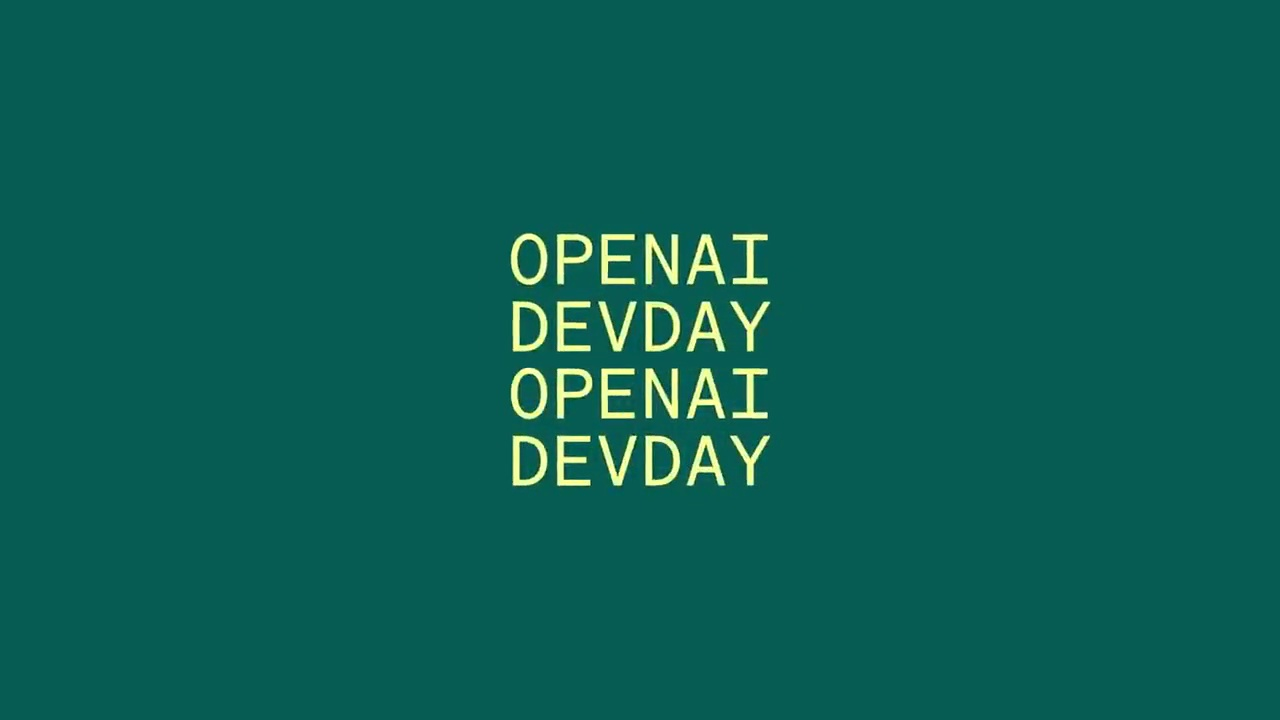

In [ ]:
display_handle = display(None, display_id=True)
for img in base64Frames: # base64Frame 리스트에 저장된 Base64로 인코딩된 이미지 프레임들을 순차적으로 디스플레이
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8")), width=600)) # 이미지를 디코딩하여 화면에 표시
    time.sleep(0.025)